In [34]:
import tensorflow as tf
import os
import cv2

directory = "../0-Data/samplesCaptcha"
images = [
    cv2.imread(os.path.join(directory, filename)) for filename in os.listdir(directory)
]
images[0].shape

(50, 200, 3)

In [35]:
gray_images = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in images]
gray_images[0].shape

(50, 200)

In [36]:
cv2.imshow("Figure", gray_images[0][12:50, 30:50])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
import numpy as np

letters = np.zeros((len(images) * 5, 38, 20))
x, y, w, h = 30, 12, 20, 50
for i in range(len(gray_images)):
    px = x
    for j in range(5):
        letters[i * 5 + j] = gray_images[i][y:h, px : px + w]
        px += w

In [38]:
cv2.imshow("Figure", letters[5])
cv2.imshow("Figure", letters[6])
cv2.imshow("Figure", letters[7])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
x = np.zeros((letters.shape[0], letters.shape[1], letters.shape[2], 1))

for i in range(letters.shape[0]):
    norm = letters[i] / 255
    img = np.reshape(letters[i], (letters.shape[1], letters.shape[2], 1))
    x[i] = img

x.shape

(5350, 38, 20, 1)

In [40]:
current_y = os.listdir(directory)
for i in range(len(current_y)):
    current_y[i] = current_y[i][0:5]
current_y[0]

'226md'

In [41]:
y = [None] * x.shape[0]
for i in range(len(current_y)):
    for j in range(5):
        y[i * 5 + j] = current_y[i][j]

y[0]

'2'

In [42]:
import string

symbols = string.ascii_lowercase + "0123456789"
symbols

'abcdefghijklmnopqrstuvwxyz0123456789'

In [43]:
final_y = np.zeros((len(y), len(symbols)))
for i in range(len(y)):
    loc_char = symbols.find(y[i])
    final_y[i, loc_char] = 1

final_y[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0.])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, final_y, test_size=0.25)

4012

In [45]:
input_shape = (x.shape[1], x.shape[2], x.shape[3])
num_classes = len(symbols)
learning_rate = 0.001
epochs = 50
batch_size = 300

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics

inputs = tf.keras.Input(shape=input_shape)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='valid')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='valid')(x)
x = layers.Flatten()(x)

x = layers.Dense(80, activation='relu')(x)

outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=optimizers.Adam(learning_rate=learning_rate),
    loss=losses.CategoricalCrossentropy(),
    metrics=[metrics.CategoricalAccuracy()],
)

history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
)

print("Treinamento finalizado.")
_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Acurácia final no teste: {test_accuracy:.3f}")

historic_acc = history.history['val_categorical_accuracy']
historic_epochs = list(range(1, epochs + 1))

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - categorical_accuracy: 0.0523 - loss: 29.4892 - val_categorical_accuracy: 0.1697 - val_loss: 3.1180
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - categorical_accuracy: 0.2996 - loss: 2.6190 - val_categorical_accuracy: 0.6413 - val_loss: 1.4346
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - categorical_accuracy: 0.7222 - loss: 1.0690 - val_categorical_accuracy: 0.7840 - val_loss: 0.8802
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - categorical_accuracy: 0.8521 - loss: 0.5404 - val_categorical_accuracy: 0.8161 - val_loss: 0.7482
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - categorical_accuracy: 0.9024 - loss: 0.3434 - val_categorical_accuracy: 0.8259 - val_loss: 0.7338
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - categorical_accuracy: 0.9361 - loss: 0.2339 - val_categorical_accuracy: 0.8348 - val_loss: 0.7144
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - categorical_accuracy: 0.9598 - loss: 0.1

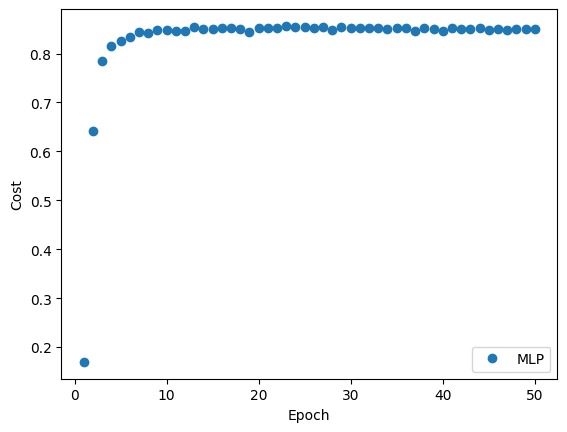

In [47]:
import matplotlib.pyplot as plt
plt.plot(historic_epochs, historic_acc, 'o', label = "MLP")
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()
plt.show()